<a href="https://colab.research.google.com/github/zooodung/TA-Prediction/blob/115dkk/ta_115dkk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

df1 = pd.read_csv("/content/drive/MyDrive/집 작업용/open/train.csv")

In [2]:
for column in df1.columns:
    unique_values = df1[column].dropna().unique()  # NaN 제외하고 고유값 추출
    unique_values_sorted = np.sort(unique_values)  # 고유값 정렬

    if df1[column].isnull().any():
      unique_values_sorted = np.insert(unique_values_sorted, 0, np.nan)

    print(f"{column}: {unique_values}")

ID: ['ACCIDENT_00000' 'ACCIDENT_00001' 'ACCIDENT_00002' ... 'ACCIDENT_39606'
 'ACCIDENT_39607' 'ACCIDENT_39608']
사고일시: ['2019-01-01 00' '2019-01-01 01' '2019-01-01 02' ... '2021-12-31 21'
 '2021-12-31 22' '2021-12-31 23']
요일: ['화요일' '수요일' '목요일' '금요일' '토요일' '일요일' '월요일']
기상상태: ['맑음' '흐림' '기타' '비' '안개' '눈']
시군구: ['대구광역시 중구 대신동' '대구광역시 달서구 감삼동' '대구광역시 수성구 두산동' '대구광역시 북구 복현동'
 '대구광역시 동구 신암동' '대구광역시 수성구 지산동' '대구광역시 달서구 상인동' '대구광역시 북구 태전동'
 '대구광역시 동구 지묘동' '대구광역시 서구 평리동' '대구광역시 동구 신기동' '대구광역시 서구 상리동'
 '대구광역시 달서구 월성동' '대구광역시 수성구 황금동' '대구광역시 북구 구암동' '대구광역시 동구 신천동'
 '대구광역시 수성구 만촌동' '대구광역시 중구 남산동' '대구광역시 서구 비산동' '대구광역시 북구 침산동'
 '대구광역시 달서구 두류동' '대구광역시 수성구 신매동' '대구광역시 달서구 대곡동' '대구광역시 달성군 유가읍'
 '대구광역시 달성군 논공읍' '대구광역시 동구 율하동' '대구광역시 수성구 시지동' '대구광역시 동구 봉무동'
 '대구광역시 달성군 다사읍' '대구광역시 중구 동산동' '대구광역시 서구 이현동' '대구광역시 남구 이천동'
 '대구광역시 수성구 수성동4가' '대구광역시 북구 노원동3가' '대구광역시 북구 서변동' '대구광역시 북구 관음동'
 '대구광역시 북구 학정동' '대구광역시 수성구 파동' '대구광역시 수성구 상동' '대구광역시 달서구 이곡동'
 '대구광역시 동구 효목동' '대구광역시 북구 읍내동' '대구광역시 중구 남성로' '대구광역시 달서구 죽전

In [3]:
df_test = df1

df_test['가해운전자 연령'] = df_test['가해운전자 연령'].replace({'세 이상': '', '세': '', '미분류': np.nan}, regex=True)
df_test['가해운전자 연령'] = pd.to_numeric(df_test['가해운전자 연령'], errors='coerce')

print(df_test['가해운전자 연령'])

stats = df_test['가해운전자 연령'].describe()
print(stats)

df_test['피해운전자 연령'] = df_test['피해운전자 연령'].replace({'세 이상': '', '세': '', '미분류': np.nan}, regex=True)
df_test['피해운전자 연령'] = pd.to_numeric(df_test['피해운전자 연령'], errors='coerce')

print(df_test['피해운전자 연령'])

stats = df_test['피해운전자 연령'].describe()
print(stats)

0        51.0
1        39.0
2        70.0
3        49.0
4        30.0
         ... 
39604    52.0
39605    60.0
39606    60.0
39607    40.0
39608    27.0
Name: 가해운전자 연령, Length: 39609, dtype: float64
count    38615.000000
mean        47.906176
std         16.060277
min          4.000000
25%         35.000000
50%         50.000000
75%         60.000000
max         98.000000
Name: 가해운전자 연령, dtype: float64
0        70.0
1        61.0
2        38.0
3        36.0
4        52.0
         ... 
39604    28.0
39605    52.0
39606    73.0
39607    57.0
39608    33.0
Name: 피해운전자 연령, Length: 39609, dtype: float64
count    38549.000000
mean        44.699655
std         16.968567
min          1.000000
25%         31.000000
50%         45.000000
75%         58.000000
max         98.000000
Name: 피해운전자 연령, dtype: float64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

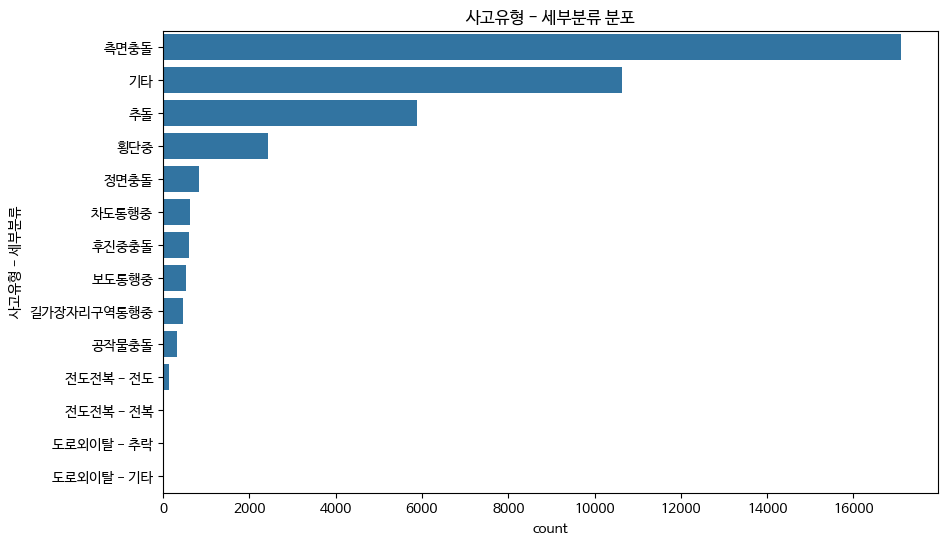

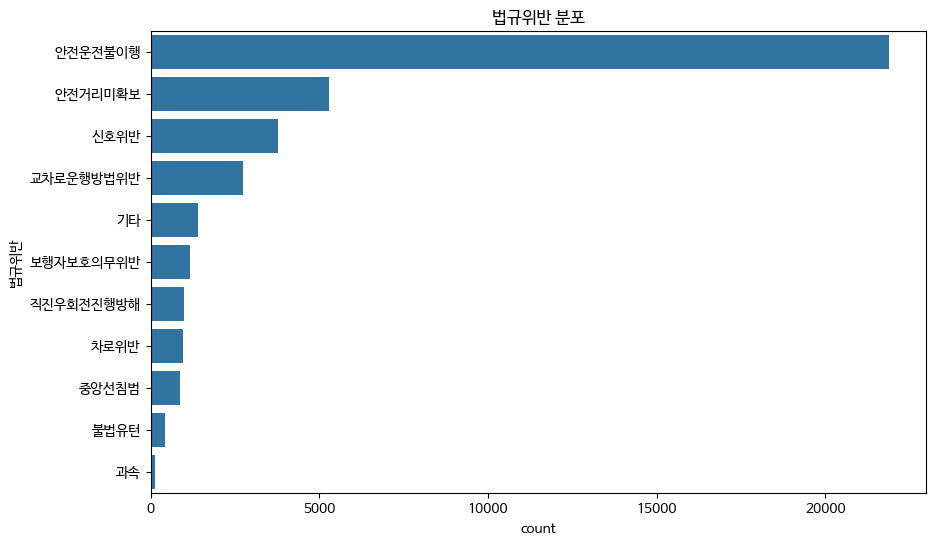

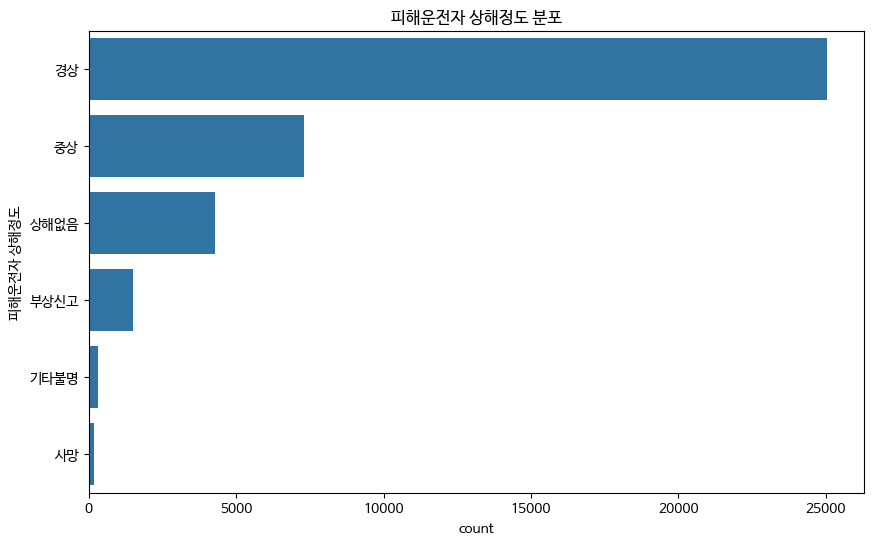

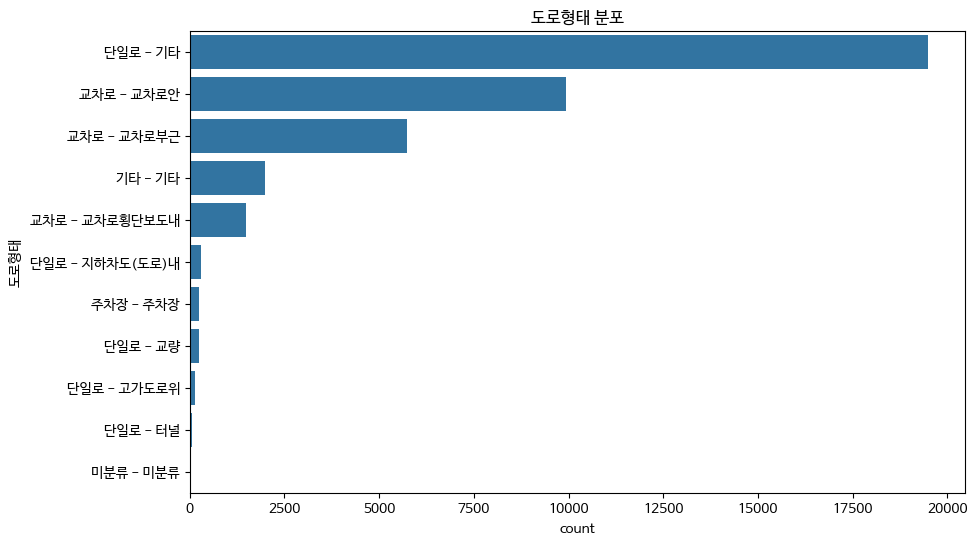

In [6]:
def plot_distribution(category, data, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=category, data=data, order = data[category].value_counts().index)
    plt.title(title)
    plt.show()

# '사고유형 - 세부분류' 분포 시각화
plot_distribution('사고유형 - 세부분류', df1, '사고유형 - 세부분류 분포')

# '법규위반' 분포 시각화
plot_distribution('법규위반', df1, '법규위반 분포')

# '피해운전자 상해정도' 분포 시각화
plot_distribution('피해운전자 상해정도', df1, '피해운전자 상해정도 분포')

plot_distribution('도로형태', df1, '도로형태 분포')

In [7]:
df1.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

<ipython-input-8-bdf75544523d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


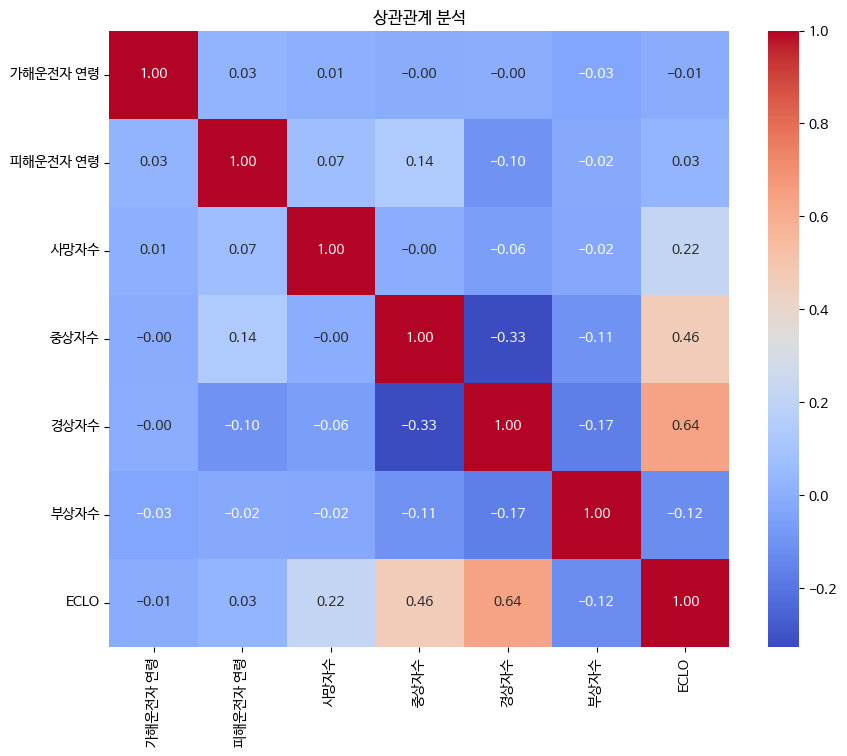

In [8]:
# 상관관계 행렬 계산
corr = df1.corr()

# 상관관계 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관관계 분석')
plt.show()

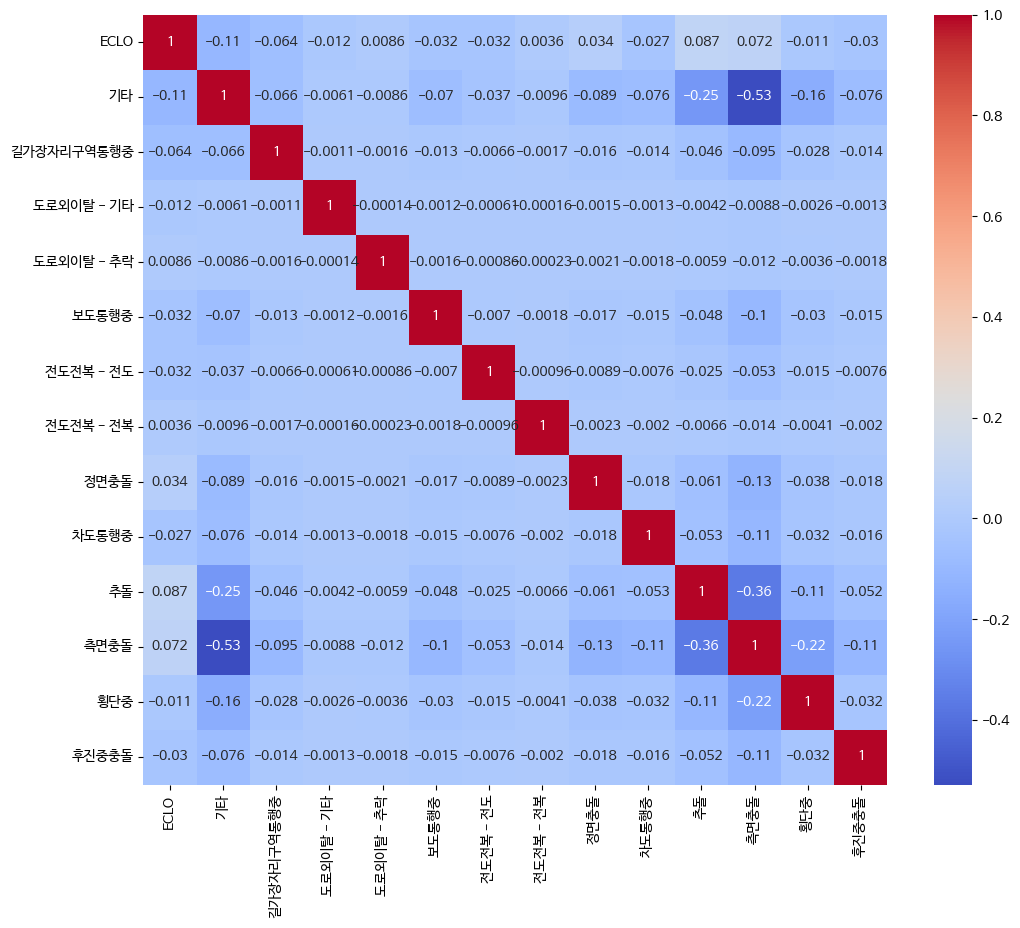

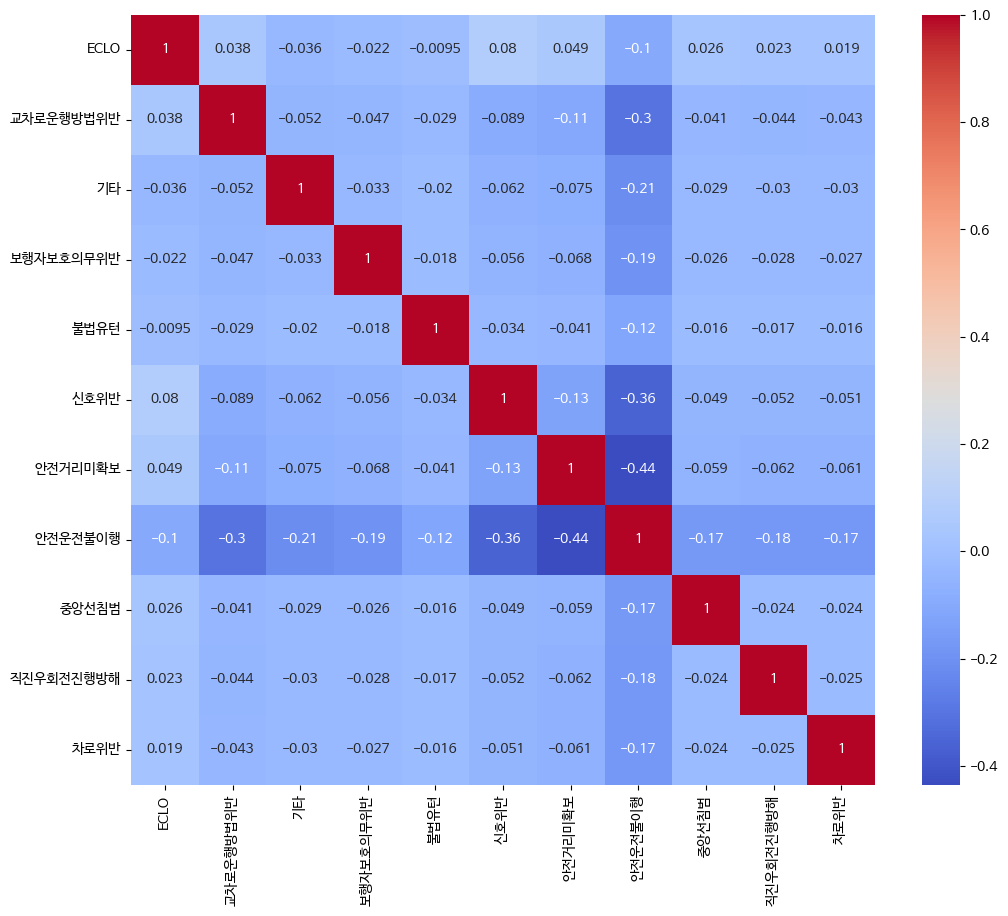

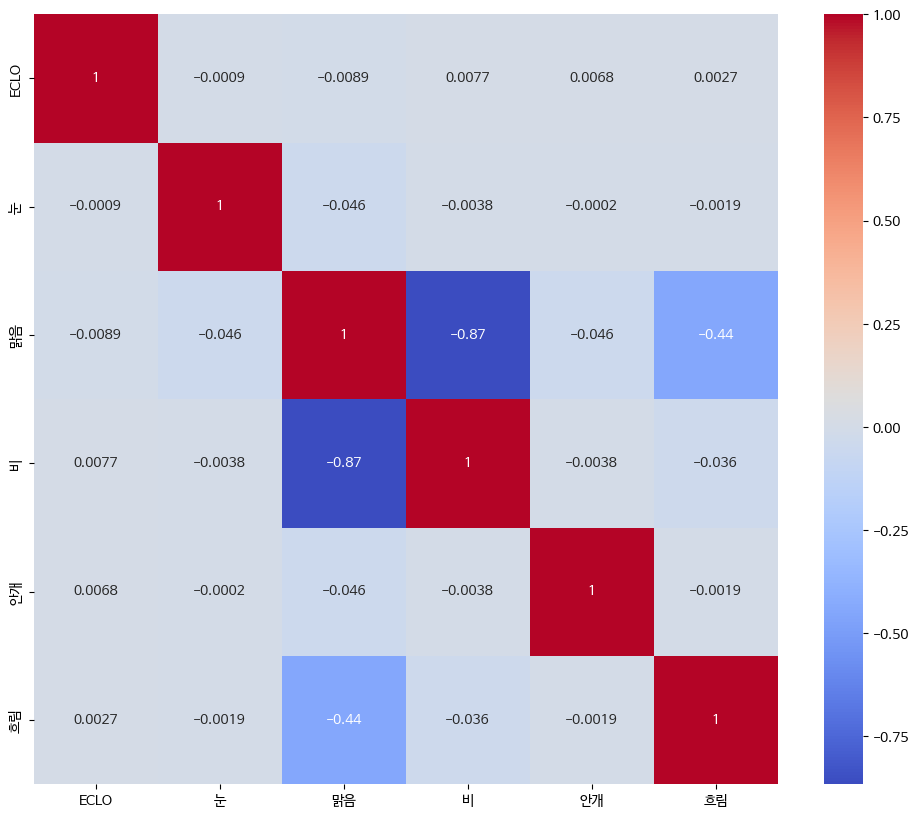

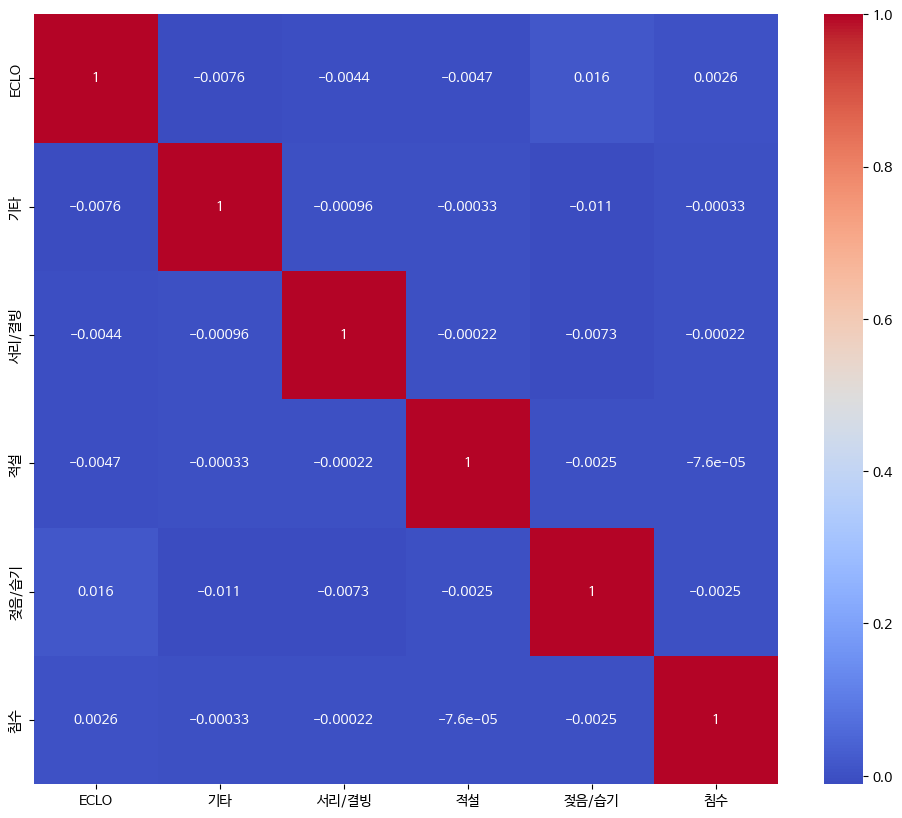

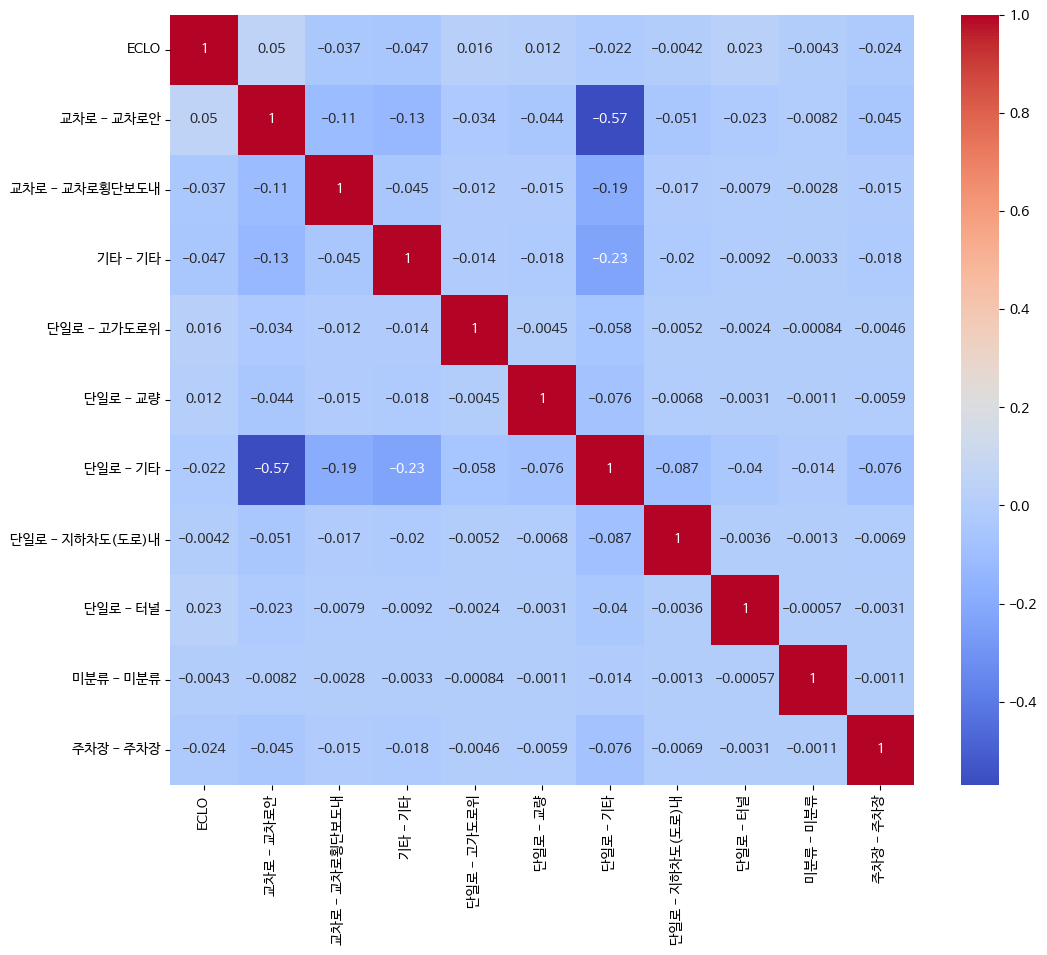

In [14]:
# 범주형 변수를 더미 변수로 변환
accident_type_dummies = pd.get_dummies(df1['사고유형 - 세부분류'], drop_first=True)
violation_dummies = pd.get_dummies(df1['법규위반'], drop_first=True)
weather_dummies = pd.get_dummies(df1['기상상태'], drop_first=True)
road_dummies = pd.get_dummies(df1['노면상태'], drop_first=True)
form_dummies = pd.get_dummies(df1['도로형태'], drop_first=True)

# 더미 변수를 원래 데이터프레임에 결합
df_acc = pd.concat([df1['ECLO'], accident_type_dummies], axis=1)
df_vio = pd.concat([df1['ECLO'], violation_dummies], axis=1)
df_wea = pd.concat([df1['ECLO'], weather_dummies], axis=1)
df_ro = pd.concat([df1['ECLO'], road_dummies], axis=1)
df_fo = pd.concat([df1['ECLO'], form_dummies], axis=1)

# 상관계수 계산
corr_acc = df_acc.corr(method='spearman')
corr_vio = df_vio.corr(method='spearman')
corr_wea = df_wea.corr(method='spearman')
corr_ro = df_ro.corr(method='pearson')
corr_fo = df_fo.corr(method='pearson')

# 상관계수 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_acc, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_vio, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_wea, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_ro, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_fo, annot=True, cmap='coolwarm')
plt.show()

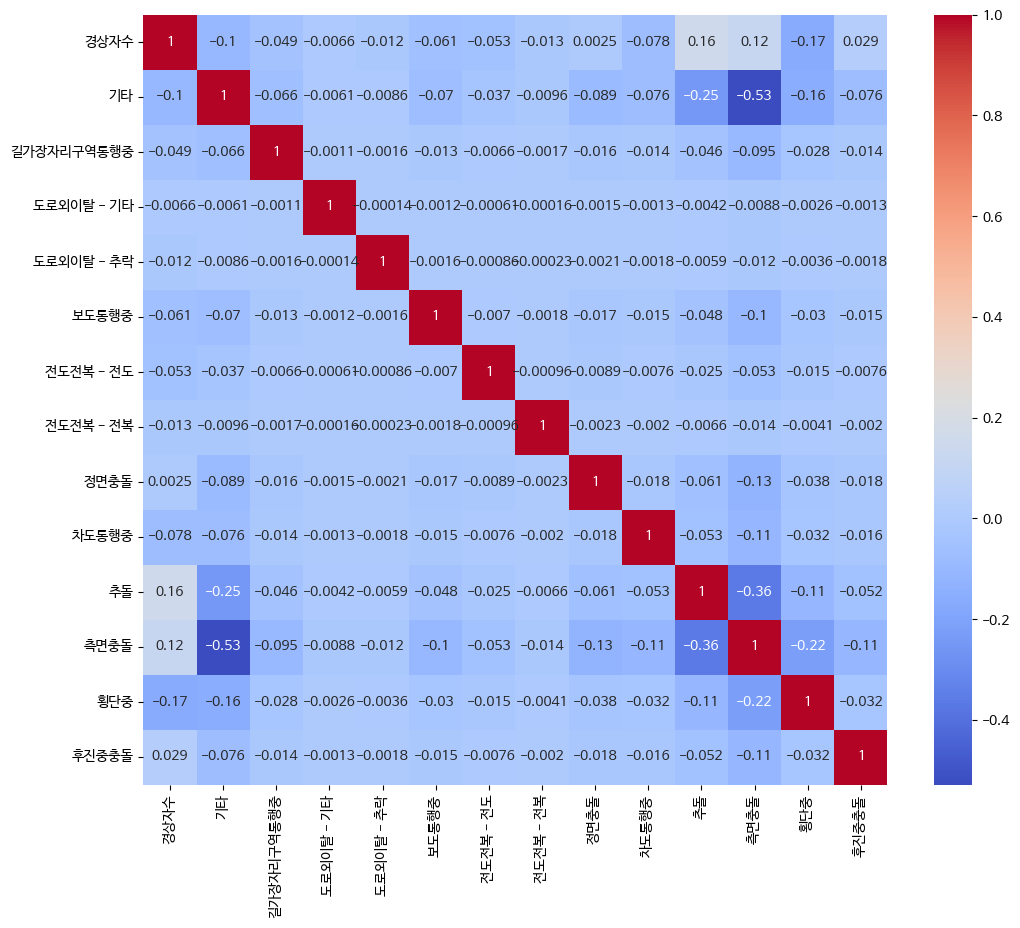

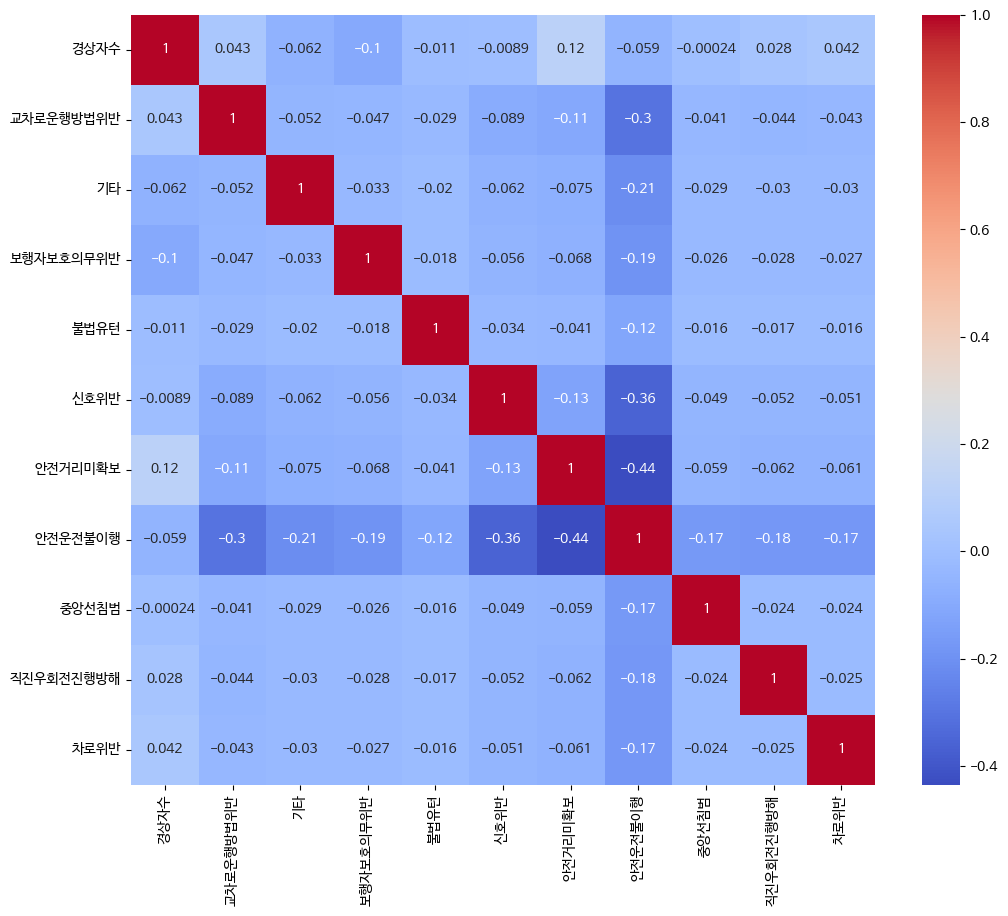

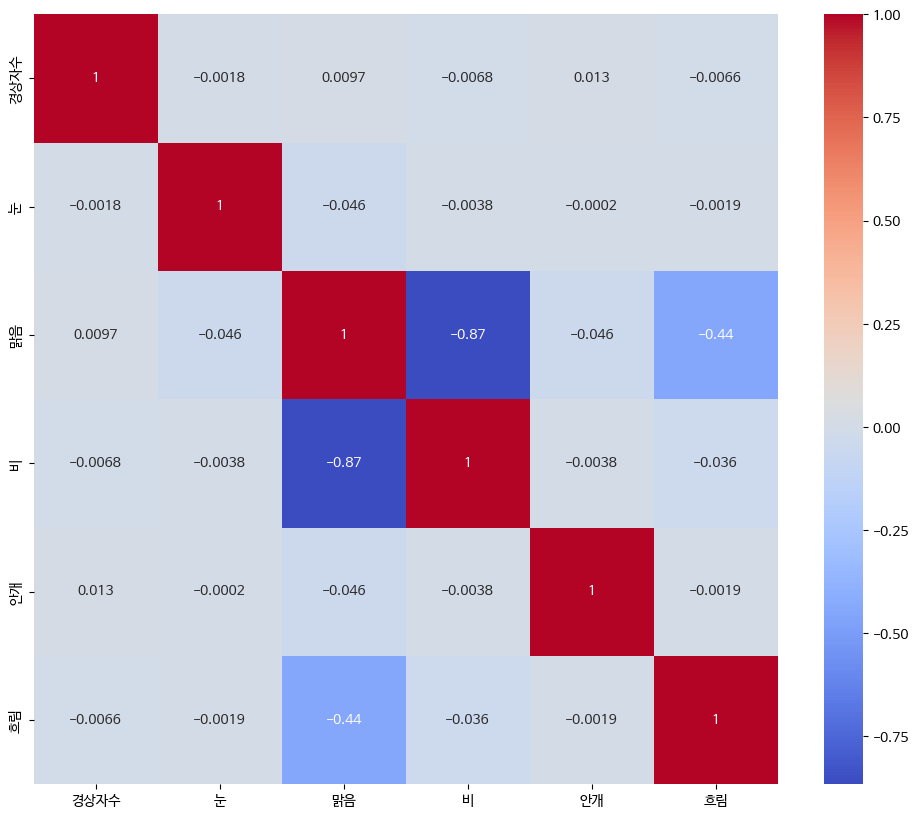

In [10]:
# 범주형 변수를 더미 변수로 변환
accident_type_dummies = pd.get_dummies(df1['사고유형 - 세부분류'], drop_first=True)
violation_dummies = pd.get_dummies(df1['법규위반'], drop_first=True)
weather_dummies = pd.get_dummies(df1['기상상태'], drop_first=True)

df_acc = pd.concat([df1['경상자수'], accident_type_dummies], axis=1)
df_vio = pd.concat([df1['경상자수'], violation_dummies], axis=1)
df_wea = pd.concat([df1['경상자수'], weather_dummies], axis=1)

# 상관계수 계산
corr_acc = df_acc.corr(method='spearman')
corr_vio = df_vio.corr(method='spearman')
corr_wea = df_wea.corr(method='spearman')

# 상관계수 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_acc, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_vio, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_wea, annot=True, cmap='coolwarm')
plt.show()

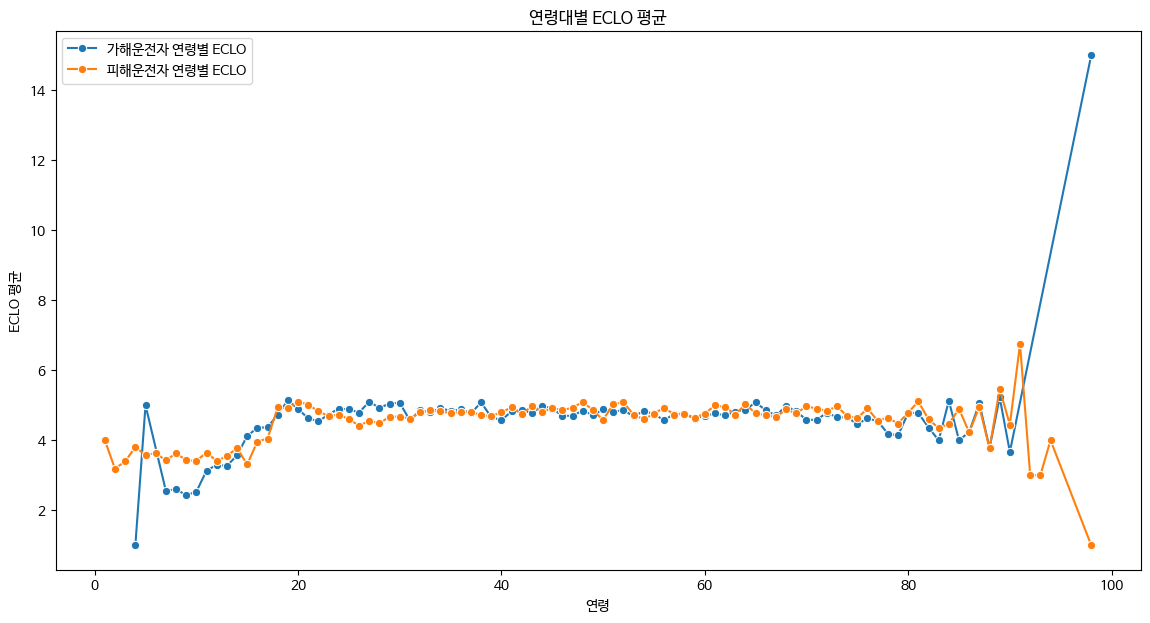

In [13]:
df2 = pd.DataFrame()

df2['가해운전자 연령'] = df1['가해운전자 연령'].replace({'세 이상': '', '세': '', '미분류': np.nan}, regex=True)
df2['가해운전자 연령'] = pd.to_numeric(df2['가해운전자 연령'], errors='coerce')

df2['피해운전자 연령'] = df1['피해운전자 연령'].replace({'세 이상': '', '세': '', '미분류': np.nan}, regex=True)
df2['피해운전자 연령'] = pd.to_numeric(df2['피해운전자 연령'], errors='coerce')

df2['ECLO'] = df1['ECLO']

# 가해운전자 연령별 ECLO의 평균을 계산합니다.
df_age_eclo = df2.groupby('가해운전자 연령')['ECLO'].mean().reset_index()

# 피해운전자 연령별 ECLO의 평균을 추가로 계산합니다.
df_victim_age_eclo = df2.groupby('피해운전자 연령')['ECLO'].mean().reset_index()

# 그래프를 그립니다.
plt.figure(figsize=(14, 7))

# 가해운전자 연령별 평균 ECLO
sns.lineplot(data=df_age_eclo, x='가해운전자 연령', y='ECLO', marker='o', label='가해운전자 연령별 ECLO')

# 피해운전자 연령별 평균 ECLO
sns.lineplot(data=df_victim_age_eclo, x='피해운전자 연령', y='ECLO', marker='o', label='피해운전자 연령별 ECLO')

plt.title('연령대별 ECLO 평균')
plt.xlabel('연령')
plt.ylabel('ECLO 평균')
plt.legend()
plt.show()

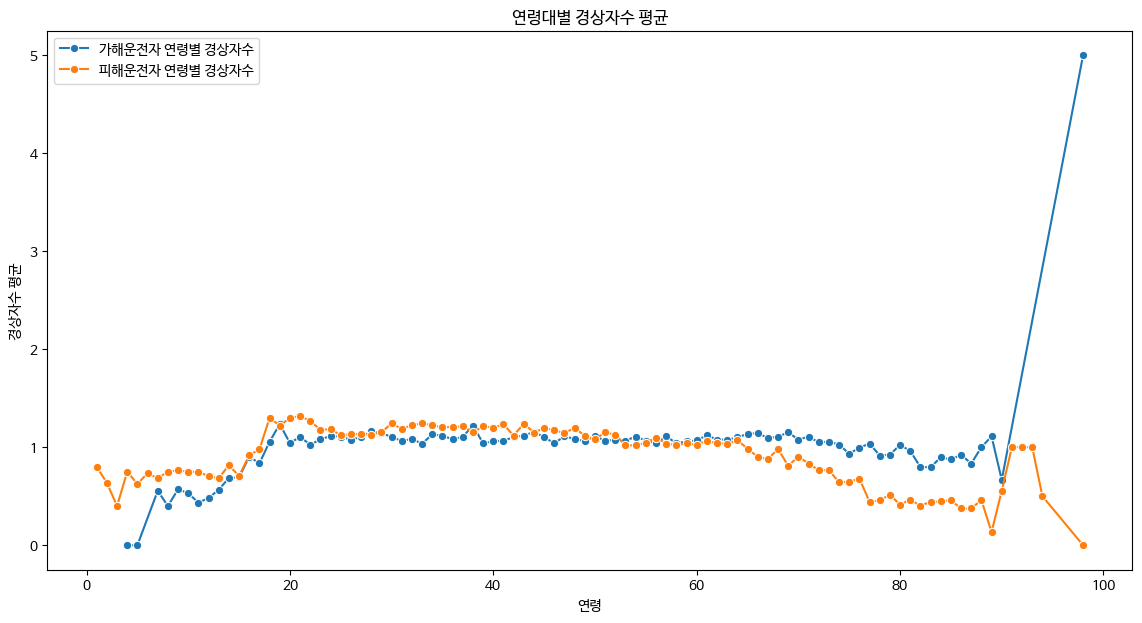

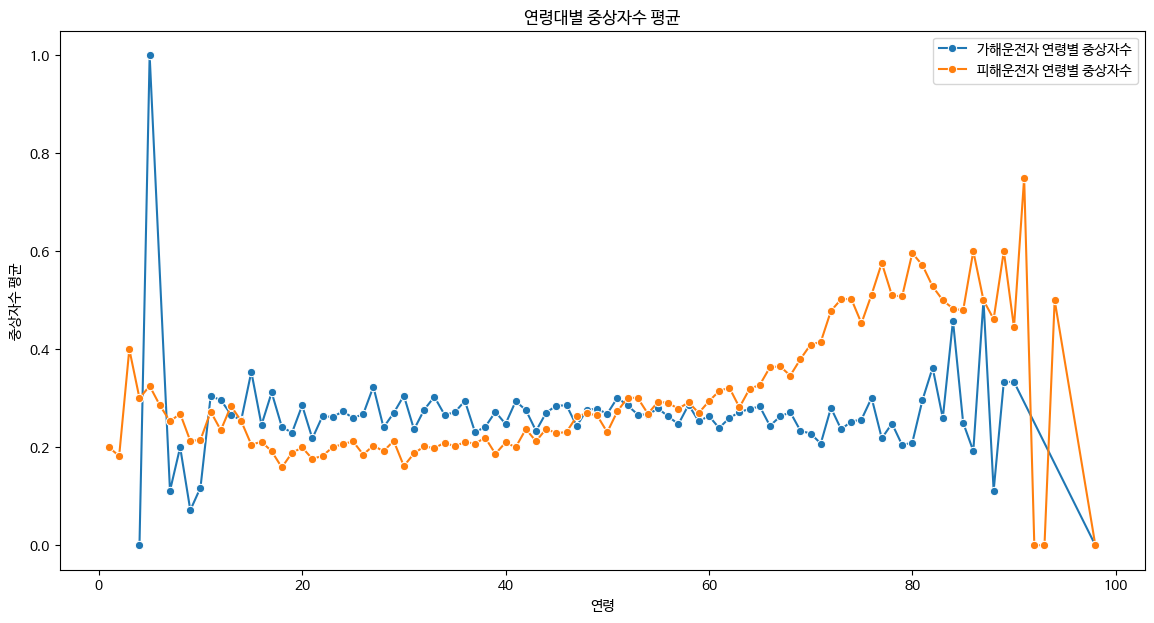

In [17]:
df2['경상자수'] = df1['경상자수']
df2['중상자수'] = df1['중상자수']

df_age_eclo = df2.groupby('가해운전자 연령')['경상자수'].mean().reset_index()

df_victim_age_eclo = df2.groupby('피해운전자 연령')['경상자수'].mean().reset_index()

plt.figure(figsize=(14, 7))

sns.lineplot(data=df_age_eclo, x='가해운전자 연령', y='경상자수', marker='o', label='가해운전자 연령별 경상자수')

sns.lineplot(data=df_victim_age_eclo, x='피해운전자 연령', y='경상자수', marker='o', label='피해운전자 연령별 경상자수')

plt.title('연령대별 경상자수 평균')
plt.xlabel('연령')
plt.ylabel('경상자수 평균')
plt.legend()
plt.show()

df_age_heavy = df2.groupby('가해운전자 연령')['중상자수'].mean().reset_index()

df_victim_age_heavy = df2.groupby('피해운전자 연령')['중상자수'].mean().reset_index()

plt.figure(figsize=(14, 7))

sns.lineplot(data=df_age_heavy, x='가해운전자 연령', y='중상자수', marker='o', label='가해운전자 연령별 중상자수')

sns.lineplot(data=df_victim_age_heavy, x='피해운전자 연령', y='중상자수', marker='o', label='피해운전자 연령별 중상자수')

plt.title('연령대별 중상자수 평균')
plt.xlabel('연령')
plt.ylabel('중상자수 평균')
plt.legend()
plt.show()

In [39]:
import numpy as np
import pandas as pd

df1 = pd.read_csv("/content/drive/MyDrive/집 작업용/open/train.csv")

columns_to_drop = ['ID', '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령',
                   '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도']

df1.drop(columns=columns_to_drop, inplace=True)

In [40]:
df1['년'] = pd.to_datetime(df1['사고일시']).dt.year
df1['월'] = pd.to_datetime(df1['사고일시']).dt.month
df1['시'] = pd.to_datetime(df1['사고일시']).dt.hour
df1.drop('사고일시', axis=1, inplace=True)

In [41]:
df1['주말여부'] = df1['요일'].apply(lambda x: '주말' if x in ['토요일', '일요일'] else '평일')

In [42]:
df1[['광역시', '구', '동']] = df1['시군구'].str.split(' ', expand=True)
df1.drop('시군구', axis=1, inplace=True)

In [43]:
df1['도로형태'].dropna()

0               단일로 - 기타
1               단일로 - 기타
2               단일로 - 기타
3               단일로 - 기타
4               단일로 - 기타
              ...       
39604         교차로 - 교차로안
39605           단일로 - 기타
39606         교차로 - 교차로안
39607            기타 - 기타
39608    단일로 - 지하차도(도로)내
Name: 도로형태, Length: 39609, dtype: object

In [56]:
df2 = pd.read_csv("/content/drive/MyDrive/집 작업용/open/external_open/countrywide_accident.csv")

columns_to_drop = ['ID', '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령',
                   '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도']

df2.drop(columns=columns_to_drop, inplace=True)

df2['년'] = pd.to_datetime(df2['사고일시']).dt.year
df2['월'] = pd.to_datetime(df2['사고일시']).dt.month
df2['시'] = pd.to_datetime(df2['사고일시']).dt.hour
df2.drop('사고일시', axis=1, inplace=True)

df2['주말여부'] = df2['요일'].apply(lambda x: '주말' if x in ['토요일', '일요일'] else '평일')

df2 = df2[~df2['도로형태'].isin(['단일로 - 철길건널목'])]
df2['도로형태'].dropna()

0         교차로 - 교차로횡단보도내
1             교차로 - 교차로안
2             교차로 - 교차로안
3                기타 - 기타
4             교차로 - 교차로안
               ...      
602770        교차로 - 교차로안
602771          단일로 - 기타
602772        교차로 - 교차로안
602773           기타 - 기타
602774          단일로 - 기타
Name: 도로형태, Length: 602763, dtype: object

In [45]:
for column in df2.columns:
    unique_values = df2[column].dropna().unique()  # NaN 제외하고 고유값 추출
    unique_values_sorted = np.sort(unique_values)  # 고유값 정렬

    if df2[column].isnull().any():
      unique_values_sorted = np.insert(unique_values_sorted, 0, np.nan)

    print(f"{column}: {unique_values}")

사고일시: ['2019-01-01 00' '2019-01-01 01' '2019-01-01 02' ... '2021-12-31 21'
 '2021-12-31 22' '2021-12-31 23']
요일: ['화요일' '수요일' '목요일' '금요일' '토요일' '일요일' '월요일']
기상상태: ['맑음' '흐림' '눈' '기타' '비' '안개']
시군구: ['서울특별시 강서구 방화동' '경기도 포천시 소흘읍' '경기도 양주시 고암동' ... '경상북도 문경시 창동'
 '전라남도 목포시 경동2가' '전라북도 군산시 송풍동']
도로형태: ['교차로 - 교차로횡단보도내' '교차로 - 교차로안' '기타 - 기타' '교차로 - 교차로부근' '단일로 - 기타'
 '단일로 - 터널' '주차장 - 주차장' '단일로 - 고가도로위' '단일로 - 교량' '단일로 - 지하차도(도로)내'
 '미분류 - 미분류' '단일로 - 철길건널목']
노면상태: ['건조' '젖음/습기' '기타' '서리/결빙' '적설' '해빙' '침수']
사고유형: ['차대사람' '차대차' '차량단독' '철길건널목']
사망자수: [0 1 2 3 4 6 5 7]
중상자수: [ 0  1  2  3  4  5  6  9 12  7  8 17 15 16 10 11 13 19 20 31]
경상자수: [ 1  0  2  5  3  4  6 12  7  8  9 10 13 15 11 19 17 14 23 16 21 32 20 28
 22 27 18 24 41 26 38 29 40 34 25]
부상자수: [ 0  1  2  3  6  5  4  9  8  7 12 10 15 14 17 18 13 25 16 47 29 11 20]
ECLO: [  3   5  10   7   6   4   1  11   8  15   9  12  18  13  23  14  56  16
  22  21  17  20  34   2  19  24  38  25  27  39  29  40  30  26  28  89
  31  36  35  75  3

In [57]:
# Assuming '대구광역시' as an example of metropolitan cities for demonstration
# New categorization logic

# Step 1: Initialize new columns for refined categorization
df2['광역시'] = None
df2['도'] = None
df2['시군'] = None
df2['구'] = None
df2['읍면동'] = None

# Step 2: Apply categorization rules
for index, row in df2.iterrows():
    parts = row['시군구'].split(' ')

    # Metropolitan cities (특별시, 광역시)
    if '광역시' in parts[0] or '특별시' in parts[0]:
        df2.at[index, '광역시'] = parts[0]
    # Provinces ('도')
    elif '도' in parts[0]:
        df2.at[index, '도'] = parts[0]

    # Distinguishing '군', '동', '읍'
    if '시' in parts[1] or '군' in parts[1]:
        df2.at[index, '시군'] = parts[1]
    elif '구' in parts[1]:
        df2.at[index, '구'] = parts[1]
    elif '동' in parts[1] or '읍' in parts[1]:
        df2.at[index, '읍면동'] = parts[1]
    else:
        df2.at[index, '읍면동'] = parts[1]

    # Assuming the last part is always '읍면동'
    if len(parts) > 2:
        df2.at[index, '읍면동'] = parts[2]

# Removing the original '시군구' column for clarity
df2.drop('시군구', axis=1, inplace=True)

df2[['광역시', '도', '시군', '구', '읍면동']]

,광역시,도,시군,구,읍면동
0,서울특별시,None,None,강서구,방화동
1,None,경기도,포천시,None,소흘읍
2,None,경기도,양주시,None,고암동
3,None,경기도,남양주시,None,다산동
4,인천광역시,None,None,부평구,부평동
...,...,...,...,...,...
602770,부산광역시,None,None,해운대구,우동
602771,서울특별시,None,None,성동구,행당동
602772,대전광역시,None,None,유성구,원신흥동
602773,None,경기도,화성시,None,서신면


In [58]:
df1.to_csv('대구.csv', index=False)
df2.to_csv('전국.csv', index=False)